In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('./data/nato-spending-by-country-2024.csv ').iloc[:-1,:]
df

,country,natoSpendingByCountry_percGdp2023,natoSpendingByCountry_defense2023_inMillionsUSD,perCapita2023,natoSpendingByCountry_percGdp2022,natoSpendingByCountry_defense2022_inMillionsUSD,perCapita2022,natoSpendingByCountry_percRealChange2014to2023
0,United States,3.49,860000,2515.985136,3.45,821830,2404.316354,12.61
1,Turkey,1.31,15842,183.653181,1.36,12286,142.429175,37.78
2,Germany,1.57,68080,817.753476,1.49,60788,730.164487,44.22
3,United Kingdom,2.07,65763,967.651671,2.16,66651,980.717904,6.84
4,France,1.90,56649,873.110392,1.88,52289,805.911301,15.20
5,Italy,1.46,31585,538.095638,1.51,30307,516.323080,37.39
6,Spain,1.26,19179,403.994888,1.07,14897,313.796957,58.01
7,Poland,3.90,29105,723.613900,2.40,16580,412.215030,189.47
8,Canada,1.38,28950,740.275806,1.22,26046,666.018088,57.54
9,Romania,2.44,8481,432.285118,1.72,5195,264.794386,152.15


In [4]:
df.columns

Index(['country', 'natoSpendingByCountry_percGdp2023',
       'natoSpendingByCountry_defense2023_inMillionsUSD', 'perCapita2023',
       'natoSpendingByCountry_percGdp2022',
       'natoSpendingByCountry_defense2022_inMillionsUSD', 'perCapita2022',
       'natoSpendingByCountry_percRealChange2014to2023'],
      dtype='object')

In [5]:
(
    df[['country', 'natoSpendingByCountry_percGdp2023']]
       .sort_values(by='natoSpendingByCountry_percGdp2023', ascending=False).head()
)

,country,natoSpendingByCountry_percGdp2023
7,Poland,3.90
0,United States,3.49
13,Greece,3.01
27,Estonia,2.73
23,Lithuania,2.54


In [6]:
nato_exp_pct_gdp = (
    df[['country', 'natoSpendingByCountry_percGdp2022','natoSpendingByCountry_percGdp2023']]
       .set_index('country')
)

(nato_exp_pct_gdp.T.pct_change().iloc[1:, :].T
   .rename(columns={'natoSpendingByCountry_percGdp2023':'pct_change_22_23'})
  .sort_values(by='pct_change_22_23')
)

,pct_change_22_23
country,
Greece,-0.220207
Belgium,-0.050420
United Kingdom,-0.041667
Turkey,-0.036765
Italy,-0.033113
Croatia,-0.016484
France,0.010638
United States,0.011594
Lithuania,0.028340


<Axes: xlabel='country'>

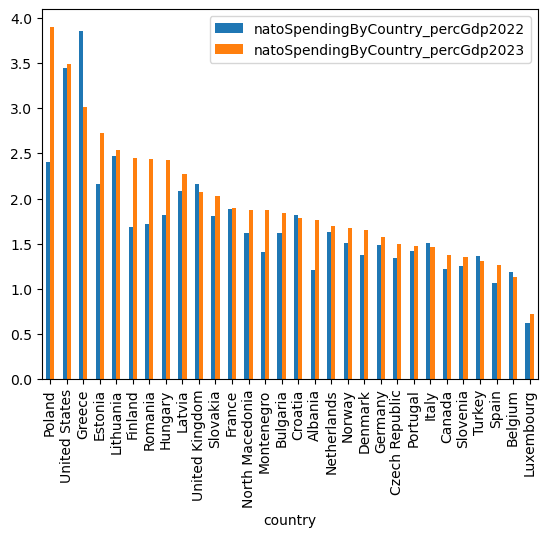

In [7]:
(
    nato_exp_pct_gdp.sort_values(by='natoSpendingByCountry_percGdp2023', ascending=False)
                    .plot(kind='bar')
)

In [105]:
tables = pd.read_html('./data/Member states of NATO - Wikipedia.html', match='Accession')
accession = (
    tables[0].loc[:, ['Name', 'Date of Accession[8]']]
        .replace({r'\[.*\]': '', r'(\d) ': r'\1-', r' (\d)': r'-\1',}, regex=True)
        .replace(r'-\(.*', '', regex=True)
).rename(columns={'Date of Accession[8]': 'Accession'})

accession['Accession'] = pd.to_datetime(accession['Accession'])

#accession['Accession'].resample('10YE', origin='1940-01-01').count()
accession

,Name,Accession
0,Albania,2009-04-01
1,Belgium,1949-08-24
2,Bulgaria,2004-03-29
3,Canada,1949-08-24
4,Croatia,2009-04-01
5,Czech Republic,1999-03-12
6,Denmark,1949-08-24
7,Estonia,2004-03-29
8,Finland,2023-04-04
9,France,1949-08-24


<Axes: xlabel='Accession'>

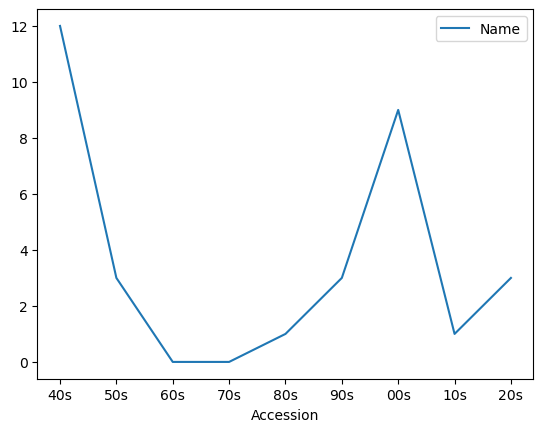

In [99]:
accession_by_decades = (
    accession
      .resample('10YS', on='Accession', origin='1940-01-01', closed='right', label='left')
      .count()
)
accession_by_decades.set_index(accession_by_decades.index.map(
    lambda dt: str(dt.year)[2:] + 's'), inplace=True)
accession_by_decades.plot(kind='line')

In [104]:
accession_countries = set(accession['Name'].to_list())
gdp_countries = set(nato_exp_pct_gdp.index.to_list())
accession_countries.difference(gdp_countries)

{'Iceland', 'Sweden'}

Iceland does not have a military, and presumably Sweden joined after the WPR report came out.